# Probabilidade de cara/coroa

A probabilidade de cara para uma moeda honesta é 1/2.

No entanto, existe alguma maneira de provar isso experimentalmente?
Neste notebook, usamos o método de Monte-Carlo para simular o lançamento de uma moeda iterativamente $N$ vezes para descobrir por que a probabilidade de cara ou coroa é sempre 1/2. 
Se repetirmos esse lançamento de moeda muitas e muitas vezes, poderemos obter maior precisão em uma resposta exata para nosso valor de probabilidade.

In [19]:
import time
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [14]:
def joga_moeda():
    """ simula a jogada de uma moeda, retornando 0 ou 1
        para representar cara ou coroa
        
    """
    # ref. https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    return np.random.randint(low=0, high=2)  # note que 2 não é incluído

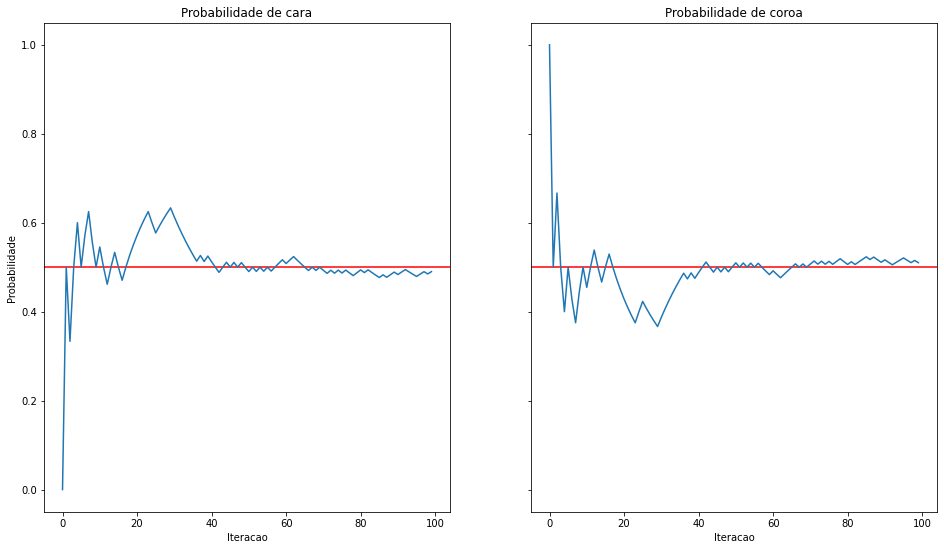

In [34]:
# Monte Carlo
p_jogadas = []
N = 1000

p_cara = 0
p_coroa = 0

for j in range(N):
    clear_output()
    jogada = joga_moeda()
    if jogada == 0:
        p_cara += 1
    else:
        p_coroa += 1
    
    p_jogadas.append([p_cara / (j + 1), p_coroa / (j + 1)])
    
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 9), sharey=True)

    ax1.axhline(y=0.5, color="red", linestyle="-")
    ax1.set_xlabel("Iteracao")
    ax1.set_ylabel("Probabilidade")
    ax1.set_title("Probabilidade de cara")
    ax1.plot([ca for ca, cr in p_jogadas])

    ax2.axhline(y=0.5, color="red", linestyle="-")
    ax2.set_xlabel("Iteracao")
    ax2.set_title("Probabilidade de coroa")
    ax2.plot([cr for ca, cr in p_jogadas])
    
    plt.show()
    time.sleep(0.1)
    clear_output(wait=True)
    plt.close(fig)
